In [33]:

import tifffile
import numpy as np
import torch
import os
import random
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt

from sr_3dunet.utils.data_utils import random_crop_3d, random_crop_2d, augment_3d, augment_2d, preprocess, get_projection, get_rotated_img, crop_block


In [8]:
def get_projection(img, iso_dimension=-1):
    list_dimensions = [-1, -2, -3]
    list_dimensions.remove(iso_dimension)
    if isinstance(img, np.ndarray):
        img_iso = np.max(img, axis=iso_dimension)
        img_aniso0 = np.max(img, axis=list_dimensions[0])
        img_aniso1 = np.max(img, axis=list_dimensions[1])
    elif isinstance(img, torch.Tensor):
        img_iso = torch.max(img, dim=iso_dimension).values
        img_aniso0 = torch.max(img, dim=list_dimensions[0]).values
        img_aniso1 = torch.max(img, dim=list_dimensions[1]).values
    return img_iso, img_aniso0, img_aniso1



In [3]:
ims_path = '/share/home/wangwb/workspace/sr_3dunet/datasets/CJ004.ims'

h5 = h5py.File(ims_path,'r')
img_total = h5['DataSet']['ResolutionLevel 0']['TimePoint 0']['Channel 3']['Data']

In [23]:
def img_loader(img, start_x, start_y, start_z, size):
    return img[start_x:start_x+size, start_y:start_y+size, start_z:start_z+size]

In [30]:
size = 256

x_floor = 0
x_upper = 7808

y_floor = 0
y_upper = 6016

z_floor = 3300
z_upper = 3800

while(True):
    start_x = random.randint(x_floor, x_upper-size-1)
    start_y = random.randint(y_floor, y_upper-size-1)
    start_z = random.randint(z_floor, z_upper-size-1)
    new_img = img_loader(img_total, start_x, start_y, start_z, size)
    
    if new_img.mean() > 1500:
        break
    
    print(start_x, start_y, start_z, new_img.mean())

2065 3424 3480 657.034646987915
1241 1265 3478 3.107912063598633
218 5295 3485 0.0
6243 4728 3535 130.74694538116455
6516 2016 3540 958.0023508071899
2165 3361 3385 690.0044021606445
1405 1136 3453 0.40707969665527344
6581 1971 3446 966.7298402786255
612 2044 3330 607.1232805252075
1452 3610 3453 305.6622772216797
5696 3461 3317 833.1299676895142
4786 5212 3461 141.61041069030762
1834 208 3518 0.0
3673 4142 3438 335.7153310775757
7536 3982 3315 81.0725908279419
2423 5700 3402 1.5491704940795898
3263 3164 3316 848.1852807998657
3531 2742 3409 746.9846487045288
1581 3446 3430 651.2315807342529
2468 3189 3436 656.6008434295654
2946 1902 3513 699.4739112854004
3384 266 3370 2.2835378646850586
269 4365 3403 0.0
7344 4148 3540 297.8098888397217
4289 549 3311 306.18293285369873
1215 4993 3410 0.0
6528 2791 3533 202.35240936279297
6627 2982 3399 548.7799367904663
2761 3312 3458 768.0007553100586
6187 913 3491 631.1638116836548
1925 1224 3510 351.5142431259155
3173 2282 3490 713.8913173675537
6

KeyboardInterrupt: 

In [28]:
size = 256

x_floor = 6400 # 0
x_upper = 7808

y_floor = 3600 # 0
y_upper = 6016

z_floor = 3300
z_upper = 3800

while(True):
    start_x = random.randint(x_floor, x_upper-size-1)
    start_y = random.randint(y_floor, y_upper-size-1)
    start_z = random.randint(z_floor, z_upper-size-1)
    new_img = img_loader(img_total, start_x, start_y, start_z, size)
    
    if new_img.mean() > 1200:
        break
    
    print(start_x, start_y, start_z, new_img.mean())

6733 4493 3503 886.425968170166
6829 5472 3481 0.0
6901 4353 3334 624.3286476135254
7468 4424 3393 41.96275043487549
7547 5474 3380 0.0
6697 5692 3453 0.0
6693 5200 3488 0.8388233184814453
7527 5336 3457 2.308255195617676
7167 4724 3388 80.14151191711426
6798 4908 3412 60.73194122314453
6785 4457 3376 675.9418201446533
6590 4774 3445 104.89911556243896
6450 5614 3451 0.0
7279 4058 3408 462.24808502197266


In [29]:
tifffile.imsave('sublittle_view.tif', new_img)

/tmp/ipykernel_2427806/440267568.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('sublittle_view.tif', new_img)


In [14]:
size = 128
img_total[6400:6400+size, 3600:3600+size, 3300:3300+size].mean()

757.031364440918

check 前景

In [5]:
front_img = tifffile.imread('view.tif')

In [6]:
front_img.shape

(1024, 768, 63)

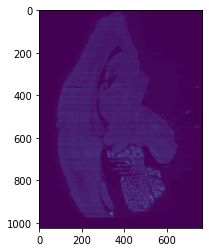

In [8]:
plt.imshow(front_img[:,:,30])

check rm009

In [23]:
ims_path = '/share/home/wangwb/workspace/sr_3dunet/datasets/LGN-V1-ROI1-1um.ims'

h5 = h5py.File(ims_path, 'r')

def print_hdf5_file_structure(g, indent=0):
    for key in g:
        if isinstance(g[key], h5py.Group):
            print(" " * indent + key)
            print_hdf5_file_structure(g[key], indent + 4)
        else:
            print(" " * indent + key)

print_hdf5_file_structure(h5)

img_total = h5['DataSet']['ResolutionLevel 0']['TimePoint 0']['Channel 0']['Data']

DataSet
    ResolutionLevel 0
        TimePoint 0
            Channel 0
                Data
                Histogram
                Histogram1024
            Channel 1
                Data
                Histogram
                Histogram1024
    ResolutionLevel 1
        TimePoint 0
            Channel 0
                Data
                Histogram
                Histogram1024
            Channel 1
                Data
                Histogram
                Histogram1024
    ResolutionLevel 2
        TimePoint 0
            Channel 0
                Data
                Histogram
                Histogram1024
            Channel 1
                Data
                Histogram
                Histogram1024
    ResolutionLevel 3
        TimePoint 0
            Channel 0
                Data
                Histogram
                Histogram1024
            Channel 1
                Data
                Histogram
                Histogram1024
    ResolutionLevel 4
        Ti

In [9]:
def img_loader(img, start_x, start_y, start_z, size):
    return img[start_x:start_x+size, start_y:start_y+size, start_z:start_z+size]

In [14]:
size = 256

x_floor = 0
x_upper = 5504

y_floor = 0
y_upper = 4032

z_floor = 0
z_upper = 4032

while(True):
    start_x = random.randint(x_floor, x_upper-size-1)
    start_y = random.randint(y_floor, y_upper-size-1)
    start_z = random.randint(z_floor, z_upper-size-1)
    new_img = img_loader(img_total, start_x, start_y, start_z, size)
    
    if new_img.mean() > 550:
        break
    
    print(start_x, start_y, start_z, new_img.mean())

4986 318 2575 134.54804229736328
556 2628 2825 470.14776515960693
2299 3208 1759 476.1226415634155
2713 2167 3220 466.77768993377686


写一遍遍历，按阈值筛，看list有多少

In [54]:
# 约848

size = 128
stride = 64 # 128

x_floor = 0
x_upper = 5504

y_floor = 0
y_upper = 4032

z_floor = 0
z_upper = 4032

threshold = 650
minmax = 1200

index = 0
start_x = start_y = start_z = 0

my_dict = {
}

for start_x in tqdm(range(x_floor, x_upper, stride)):
    for start_y in tqdm(range(y_floor, y_upper, stride)):
        for start_z in range(z_floor, z_upper, stride):
            new_img = img_loader(img_total, start_x, start_y, start_z, size)
            new_img_mean = new_img.mean()
            new_img_max = new_img.max()
            if  new_img_mean> threshold and new_img_max > minmax:
                index += 1
                my_dict[str(start_x)+'_'+str(start_y)+'_'+str(start_z)] = new_img_mean

print(index)

 36%|███▌      | 31/86 [47:54<1:24:59, 92.71s/it]


KeyboardInterrupt: 

In [55]:
my_dict

sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))

# 输出排序后的前五个键值对
for key in list(sorted_dict)[:5]:
    print(key, ":", sorted_dict[key])

1152_2560_2880 : 650.0094146728516
1664_1984_1664 : 650.0313110351562
1728_512_832 : 650.0389175415039
1664_2112_2240 : 650.0414962768555
1920_3456_3776 : 650.0441436767578


In [60]:
img = img_total[1152:1152+size, 2560:2560+size, 2880:2880+size]

tifffile.imsave('tmp.tif', img)

print(img.max())

36592


/tmp/ipykernel_3927356/749480096.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('tmp.tif', img)


4384